***Part 1: Data Cleaning***

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install unidecode

     |████████████████████████████████| 235 kB 4.6 MB/s 


In [3]:
#Clean sentiment_analysis
#First import the data
df_s = pd.read_csv('sentiment_analysis.csv')
df_s

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [4]:
print(df_s.iloc[7]['text'])

RT @BantySrkian: #SRK and kajol in the making of DDLJ song .. Both are greatest ever 🙏🙏🙏 https://t.co/Aa7fAvvtNE


In [5]:
import re
df_s['text'] = df_s.apply(lambda x: re.sub(r'https?:\/\/\S*', '', x['text']), axis = 1) # Remove all URL
print(df_s.iloc[7]['text'])
from unidecode import unidecode
df_s['text'] = df_s.apply(lambda x: unidecode(x['text']), axis = 1) # Replace Html character codes with ASCII equivalent
print(df_s.iloc[7]['text'])
df_s['text'] = df_s.apply(lambda x: x['text'].lower(), axis=1) # All text in lowercase
print(df_s.iloc[7]['text'])
df_s['text'] = df_s.apply(lambda x: re.findall(r'\w+', x['text']), axis=1) # Sentences to words, no html tags and attributes
print(df_s.iloc[7]['text'])

RT @BantySrkian: #SRK and kajol in the making of DDLJ song .. Both are greatest ever 🙏🙏🙏 
RT @BantySrkian: #SRK and kajol in the making of DDLJ song .. Both are greatest ever  
rt @bantysrkian: #srk and kajol in the making of ddlj song .. both are greatest ever  
['rt', 'bantysrkian', 'srk', 'and', 'kajol', 'in', 'the', 'making', 'of', 'ddlj', 'song', 'both', 'are', 'greatest', 'ever']


In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))
print(sw) # The stop words like  “the”, “a”, “an”, “have”,"i"
df_s['text'] = df_s.apply(lambda x: [word for word in x['text'] if word not in sw], axis = 1) # Remove stop words
print(df_s.iloc[7]['text'])
print(df_s.iloc[9]['text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'before', 'did', 'the', 'very', 'hasn', 'have', 'its', 'both', 'nor', 'don', "shan't", 'does', 'd', "you'd", 'i', 'shouldn', 'they', 'has', 'but', 'himself', 'myself', 'until', 'to', 'once', 'll', 'been', 'further', 'which', 'mightn', 'those', 'after', 'if', "it's", 'above', 'whom', 'up', 'me', 'itself', 'most', "that'll", "aren't", "she's", 'themselves', 'under', 'his', 'not', 's', 'o', 'her', 'had', 'you', 'each', 'too', 'isn', 'such', "needn't", 'out', "wasn't", 'will', "hadn't", "you'll", 'some', 'when', 'any', 'on', 'm', 'own', 'with', 'more', 'than', 'shan', "should've", 'same', 'mustn', "mustn't", 'below', 'all', 'over', 'can', 'wouldn', 'herself', "haven't", 'other', 'who', 'as', 'of', 'ma', 'he', 'them', 'at', "didn't", 'why', 'by', 'how', 'then', 'about', "hasn't", "you're", 'we', 'are', 'hadn', "isn't", 'these', "couldn't", "shouldn't", "you've", 'theirs', 'between

In [7]:
df_s

,ID,text,label
0,7.680980e+17,"[josh, jenkins, looking, forward, tab, breeder...",1
1,7.680980e+17,"[rt, mianusmanjaved, congratulations, pakistan...",1
2,7.680980e+17,"[rt, pepalerts, september, yesmag, taking, mai...",1
3,7.680980e+17,"[rt, david_gaibis, newly, painted, walls, than...",1
4,7.680980e+17,"[rt, cedricfeschotte, excited, announce, july,...",1
...,...,...,...
550386,8.046170e+17,"[goddesses_o, stop, watching, mm]",0
550387,8.046180e+17,"[poor, old, tom, odell, look, like, would, kno...",0
550388,8.046180e+17,"[antsmasher, smashed, 7, ants, awesome, game, ...",1
550389,8.046180e+17,"[lizhudston, kymwyllie, evasmiless, meanbok, l...",1


In [8]:
#Clean Canadian election data
df_c = pd.read_csv('Canadian_elections_2021.csv')
df_c

,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN
...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others
998,@davidakin Trudeau imposes gun control policie...,negative,gun control
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies


In [9]:
print(df_c.iloc[7]['text'])

I have to say this. I've been skeptical and critical of mainstream Canadian journalism, but I have never seen this level of trying to choose the winner/influence the outcome of an election as I have with this one. I feel objectivity is a lost art for many in #cdnmedia. #cdnpoli


In [10]:
df_c['text'] = df_c.apply(lambda x: re.sub(r'https?:\/\/\S*', '', x['text']), axis = 1) # Remove URL links
print(df_c.iloc[7]['text'])
df_c['text'] = df_c.apply(lambda x: unidecode(x['text']), axis = 1) # Replace Html character codes with ASCII equivalent
print(df_c.iloc[7]['text'])
df_c['text'] = df_c.apply(lambda x: x['text'].lower(), axis=1) # All text in lowercase
print(df_c.iloc[7]['text'])
df_c['text'] = df_c.apply(lambda x: re.findall(r'\w+', x['text']), axis=1) # Sentences to words, no html tages and attributes
print(df_c.iloc[7]['text'])
df_c['text'] = df_c.apply(lambda x: [word for word in x['text'] if word not in sw], axis = 1) # Remove stop words
print(df_c.iloc[7]['text'])

I have to say this. I've been skeptical and critical of mainstream Canadian journalism, but I have never seen this level of trying to choose the winner/influence the outcome of an election as I have with this one. I feel objectivity is a lost art for many in #cdnmedia. #cdnpoli
I have to say this. I've been skeptical and critical of mainstream Canadian journalism, but I have never seen this level of trying to choose the winner/influence the outcome of an election as I have with this one. I feel objectivity is a lost art for many in #cdnmedia. #cdnpoli
i have to say this. i've been skeptical and critical of mainstream canadian journalism, but i have never seen this level of trying to choose the winner/influence the outcome of an election as i have with this one. i feel objectivity is a lost art for many in #cdnmedia. #cdnpoli
['i', 'have', 'to', 'say', 'this', 'i', 've', 'been', 'skeptical', 'and', 'critical', 'of', 'mainstream', 'canadian', 'journalism', 'but', 'i', 'have', 'never', 's

In [11]:
df_c

,text,sentiment,negative_reason
0,"[canadian, election, power, grab, pm, trudeau,...",negative,calling election early
1,"[hope, trudeau, loses, canadian, election, tom...",negative,covid
2,"[dear, canadians, election, test, progressive,...",positive,NaN
3,"[canadian, friends, never, forget, trudeau, 2,...",negative,calling election early
4,"[sorry, thejagmeetsingh, voted, ndp, life, ele...",positive,NaN
...,...,...,...
997,"[absolutely, horrible, canada, forthcoming, el...",negative,others
998,"[davidakin, trudeau, imposes, gun, control, po...",negative,gun control
999,"[canada, election, stolen, thugs, uneducated, ...",negative,others
1000,"[toole, amends, platform, gun, control, questi...",negative,tell lies




***Part2 Exploratory analysis***

Step 1: Determine the political party

In [12]:
df_c['political_party'] = ''
for i in range(len(df_c)):
  text = df_c.iloc[i]['text']
  for j in range(len(text)):
    if text[j] in ['liberal', 'voteliberal', 'justintrudeau','justin', 'trudeau', 'TrudeauHimbecile']:
      df_c.at[i, 'political_party']= 'Liberal'
    if text[j] in ['conservative', 'toole', 'erin', 'erinotoole', 'otoole', 'conservatives']:
      df_c.at[i, 'political_party']= 'Conservative'
    if text[j] in ['ndp', 'thejagmeetsingh', 'votendp', 'jagmeet', 'singh', 'ndp2021']:
      df_c.at[i, 'political_party']= 'NDP'    
    if text[j] in ['ppc', 'maximebernier', 'voteforhumanrights', 'voteforfreedom', 'freedoms', 'freedom', 'voteppc', 'votepc2021']:
      df_c.at[i, 'political_party'] = 'PPC'
df_c

,text,sentiment,negative_reason,political_party
0,"[canadian, election, power, grab, pm, trudeau,...",negative,calling election early,Liberal
1,"[hope, trudeau, loses, canadian, election, tom...",negative,covid,Liberal
2,"[dear, canadians, election, test, progressive,...",positive,NaN,
3,"[canadian, friends, never, forget, trudeau, 2,...",negative,calling election early,Liberal
4,"[sorry, thejagmeetsingh, voted, ndp, life, ele...",positive,NaN,PPC
...,...,...,...,...
997,"[absolutely, horrible, canada, forthcoming, el...",negative,others,PPC
998,"[davidakin, trudeau, imposes, gun, control, po...",negative,gun control,Conservative
999,"[canada, election, stolen, thugs, uneducated, ...",negative,others,
1000,"[toole, amends, platform, gun, control, questi...",negative,tell lies,Conservative


I choose some key words set for each party by looking at the hashtags or some sensative words.For example, for the Liberal party, I pick ['liberal', 'voteliberal', 'justintrudeau','justin', 'trudeau', ‘TrudeauHimbecile’]. If the tweets contain any words in the list; then, it will be gathered into the Liberal group. Similarly, for the Conservative, I choose ['conservative', 'toole', 'erin', 'erinotoole', 'otoole', 'conservatives']. I follow the sample pattern when I try to deal with the NDP and the PPC. Then I add a new column in the data frame called “political party”.

Step 2: Summary Table and the Graph analysis

In [13]:
data = {'Liberal': len(df_c[df_c['political_party'] == 'Liberal']),
        'Conservative': len(df_c[df_c['political_party'] == 'Conservative']),
        'NDP': len(df_c[df_c['political_party'] == 'NDP']),
        'PPC': len(df_c[df_c['political_party'] == 'PPC']),
        'NA': len(df_c[df_c['political_party'] == ''])}
data

{'Conservative': 236, 'Liberal': 347, 'NA': 279, 'NDP': 47, 'PPC': 93}

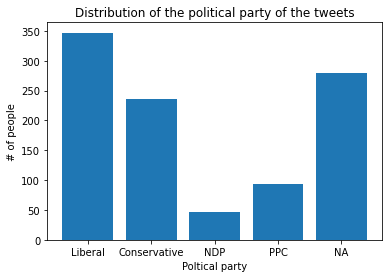

In [14]:
import matplotlib.pyplot as plt
plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.xlabel('Poltical party')
plt.ylabel('# of people')
plt.title('Distribution of the political party of the tweets')
plt.show()

It shows the political party distribution of the tweets; we can see most people discussed the two political parties: Liberal and Conservative, and Liberal Party is the most topical.

In [15]:
data2 = {'Liberal_positive': len(df_c[(df_c['political_party'] == 'Liberal') & (df_c['sentiment'] == 'positive')]),
         'Liberal_negative': len(df_c[(df_c['political_party'] == 'Liberal') & (df_c['sentiment'] == 'negative')]),
         'Conservative_positive': len(df_c[(df_c['political_party'] == 'Conservative') & (df_c['sentiment'] == 'positive')]),
         'Conservative_negative': len(df_c[(df_c['political_party'] == 'Conservative') & (df_c['sentiment'] == 'negative')]),
         'NDP_positive': len(df_c[(df_c['political_party'] == 'NDP') & (df_c['sentiment'] == 'positive')]),
         'NDP_negative': len(df_c[(df_c['political_party'] == 'NDP') & (df_c['sentiment'] == 'negative')]),
         'PPC_positive': len(df_c[(df_c['political_party'] == 'PPC') & (df_c['sentiment'] == 'positive')]),
         'PPC_negative': len(df_c[(df_c['political_party'] == 'PPC') & (df_c['sentiment'] == 'negative')]),
         'NA_positive': len(df_c[(df_c['political_party'] == '') & (df_c['sentiment'] == 'positive')]),
         'NA_negative': len(df_c[(df_c['political_party'] == '') & (df_c['sentiment'] == 'negative')])}
data2

{'Conservative_negative': 102,
 'Conservative_positive': 134,
 'Liberal_negative': 167,
 'Liberal_positive': 180,
 'NA_negative': 87,
 'NA_positive': 192,
 'NDP_negative': 10,
 'NDP_positive': 37,
 'PPC_negative': 21,
 'PPC_positive': 72}

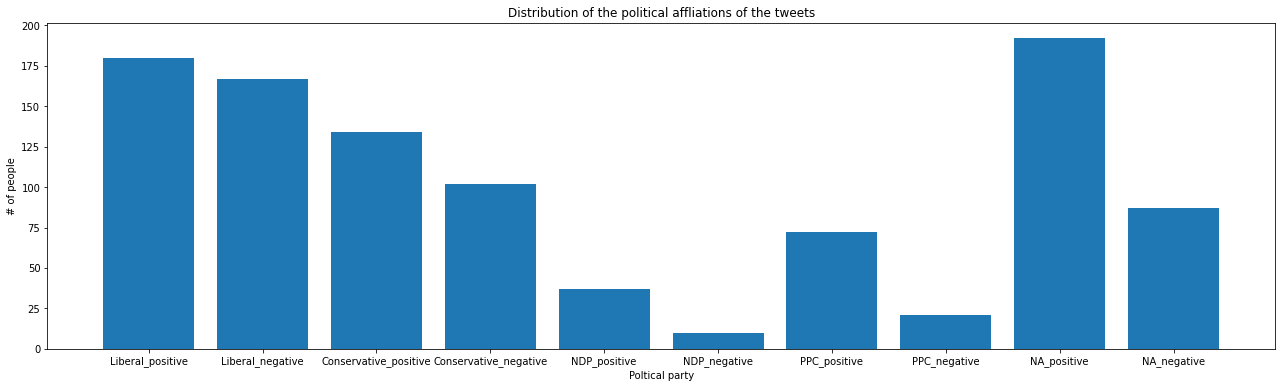

In [16]:
fig = plt.figure(figsize=(22, 6))
plt.bar(range(len(data2)), list(data2.values()), align='center')
plt.xticks(range(len(data2)), list(data2.keys()))
plt.xlabel('Poltical party')
plt.ylabel('# of people')
plt.title('Distribution of the political affliations of the tweets')
plt.show()

From the result shown above, we can see that the number of people who support the Liberal and the number of people who choose negative to the Liberal are very close. As a reslut, we can see that the Liberal Party is the most controversial party amone these four parties. Conservative party is also kind of controversial, around 60% of the people agree with it, and 40% people has negative opinion. For the other two political parties: NDP and PPC, we can see that the different between the number of people who support and who disagree is very large. Most of people who talk about the NDP or PPC, presents their supportive to the party.

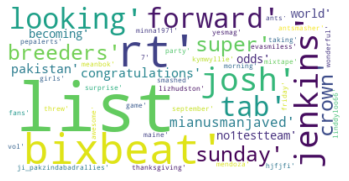

In [17]:
# Graphical figure
# Sentiment analysis
from wordcloud import WordCloud
text = df_s['text'].ravel()
wordcloud = WordCloud(max_font_size=80, max_words=50, background_color="white").generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

For wordcloud, the word size is proportional to the frequency. So in the Sentiment analysis, we can see that the most frequently appeared words are 'list', 'bixbeat', 'looking', 'josh', 'breeders'.

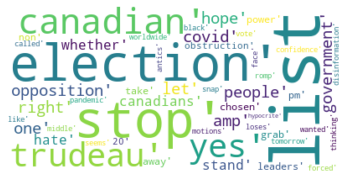

In [18]:
# Canadian Elections
text = df_c['text'].ravel()
wordcloud = WordCloud(max_font_size=80, max_words=50, background_color="white").generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In Canadian Elections, the most common words are 'electon', 'trudeau', 'list', 'stop', 'canadian'.

<Figure size 864x432 with 0 Axes>

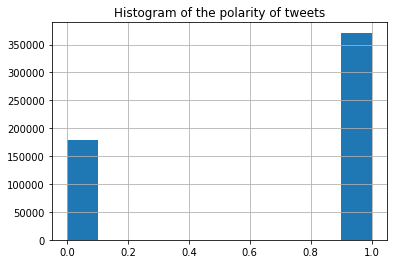

In [19]:
# Sentiment analysis
fig = plt.figure(figsize=(12,6))
df_s.hist('label') # Label 0 = negative sentiment, 1 = positive sentiment
plt.title('Histogram of the polarity of tweets')
plt.show()

From the graph, we can see that there are more positive tweets than the negative tweets.

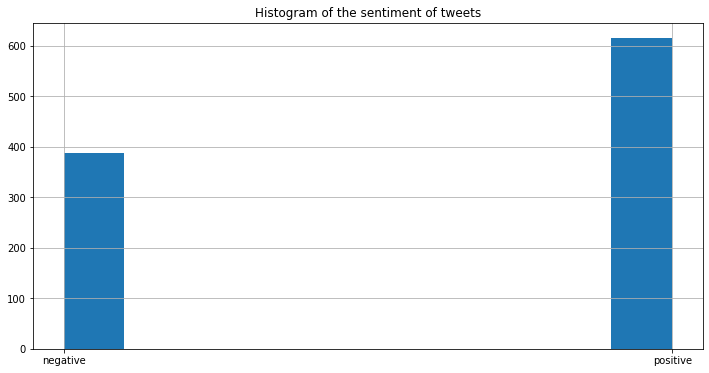

In [20]:
# Canadian Elections
fig = plt.figure(figsize=(12,6))
df_c['sentiment'].hist() 
plt.title('Histogram of the sentiment of tweets')
plt.show()

From the graph of the Canadian Election data, we can see that there are more positive tweets than the negative tweets.

I am also wondering wether the length of the tweet will influence the result of the sentiment or not. So I draw the histogram graph of the length of the tweet VS the number of people for both negative attitude and positive attitude.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f05a4307490>,
      dtype=object)

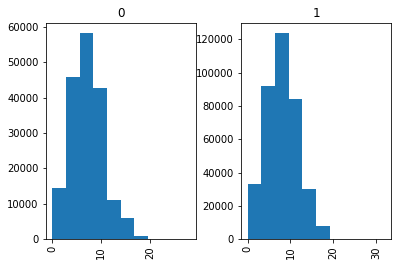

In [74]:
# Sentiment analysis
df_s['length'] = df_s.apply(lambda x: len(x['text']), axis = 1)
df_s.hist('length', by='label')

The distributions of tweet length for both positive and negative are very similar but the tail for positive tweets is slightly heavier than those for negative tweets. The length of tweets does not have much impact on the sentiment.

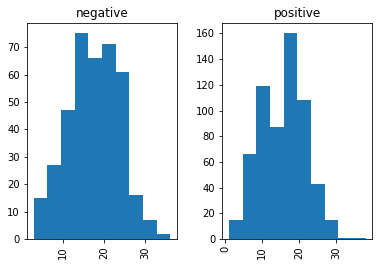

In [22]:
# Canadian Elections
df_c['length'] = df_c.apply(lambda x: len(x['text']), axis = 1)
df_c.hist('length', by='sentiment')
plt.show()

The distributions of length for both positive and negative are very similar but the positive tweets has a longer left tail compared to the negative tweets. The length of tweets does not significantly influence the sentiment.


***Part3: Sentiment Classification - Model implementation and tuning***

a) Machine learning models:

In [24]:
#Data Preparation
# Transfer the list of words into sentence on df_s
df_s_copy = df_s[['text']]
df_s['text_s'] = df_s_copy
df_s
for i in range(len(df_s)):
  a = df_s.iloc[i]['text']
  df_s.at[i, 'text_s'] = ' '.join(a) 

In [25]:
# Transfer the list of words into sentence on df_c
df_c_copy = df_c[['text']]
df_c['text_s'] = df_c_copy
df_c
for i in range(len(df_c)):
  b = df_c.iloc[i]['text']
  df_c.at[i, 'text_s'] = ' '.join(b)

TD-IDF can compute a score for each word in “text_s” to signify its importance. Bag of Words turns “text_s” into fixed-length vectors by counting the words frequency(Will be used in the next part). So I create a new column, “text_s”, in both df to stores the sentence combined from a list of words in column “text”.

In [26]:
import numpy as np
import sklearn
import sklearn.linear_model as linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [27]:
# Split Data and use TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
TV = TfidfVectorizer()
model1 = TV.fit(df_s['text_s'])
X1 = model1.transform(df_s['text_s'])
y1 = df_s['label']
X_train_TFIDF, X_test_TFIDF, y_train_TFIDF, y_test_TFIDF = train_test_split(X1,y1,test_size=0.2) 

In [28]:
# 1.Logistic Regression
model_11 = LogisticRegression()
model_11.fit(X_train_TFIDF,y_train_TFIDF)
predictions_11 = model_11.predict(X_test_TFIDF)
score_11 = accuracy_score(y_test_TFIDF,predictions_11)
print ('Accuracy score of TF-IDF by using logistic regression is', score_11*100, '%')

Accuracy score of TF-IDF by using logistic regression is 97.18474913471235 %


In [29]:
# 2.KNN （20minmin running time)
from sklearn.neighbors import KNeighborsClassifier

model_21 = KNeighborsClassifier(n_neighbors = 5)
model_21.fit(X_train_TFIDF,y_train_TFIDF)
predictions_21 = model_21.predict(X_test_TFIDF)
score_21 = accuracy_score(y_test_TFIDF,predictions_21)
print ('Accuracy score of TF-IDF by using k-NN is', score_21*100, '%')

Accuracy score of TF-IDF by using k-NN is 54.231052244297274 %


In [30]:
# 3.Navie Bayes
from sklearn.naive_bayes import MultinomialNB
# TF-IDF
model_31 = MultinomialNB()
model_31.fit(X_train_TFIDF,y_train_TFIDF)
predictions_31 = model_31.predict(X_test_TFIDF)
score_31 = accuracy_score(y_test_TFIDF,predictions_31)
print ('Accuracy score of TF-IDF by using Naive Bayes is', score_31*100, '%')

Accuracy score of TF-IDF by using Naive Bayes is 91.22811798799044 %


In [31]:
# 4.SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

model_41 = make_pipeline(StandardScaler(with_mean=False, with_std=False), LinearSVC())
model_41.fit(X_train_TFIDF,y_train_TFIDF)
predictions_41 = model_41.predict(X_test_TFIDF)
score_41 = accuracy_score(y_test_TFIDF,predictions_41)
print ('Accuracy score of TF-IDF by using SVM is', score_41*100, '%')

Accuracy score of TF-IDF by using SVM is 97.42911908720102 %


In [32]:
# 5.Decision Tree （18 mins running time)
from sklearn.tree import DecisionTreeClassifier

model_51 = DecisionTreeClassifier(random_state=0)
model_51.fit(X_train_TFIDF,y_train_TFIDF)
predictions_51 = model_51.predict(X_test_TFIDF)
score_51 = accuracy_score(y_test_TFIDF,predictions_51)
print ('Accuracy score of TF-IDF by using decision trees is', score_51*100, '%')

Accuracy score of TF-IDF by using decision trees is 95.05173557172576 %


In [33]:
# 6.Random Forest
from sklearn.ensemble import RandomForestClassifier

model_61 = RandomForestClassifier(random_state=0, max_depth = 10)
model_61.fit(X_train_TFIDF,y_train_TFIDF)
predictions_61 = model_61.predict(X_test_TFIDF)
score_61 = accuracy_score(y_test_TFIDF,predictions_61)
print ('Accuracy score of TF-IDF by using random forest is', score_61*100, '%')

Accuracy score of TF-IDF by using random forest is 67.45155751778267 %


In [34]:
# 7.XGBoost
import xgboost as xgb

model_71 = xgb.XGBClassifier()
model_71.fit(X_train_TFIDF,y_train_TFIDF)
predictions_71 = model_71.predict(X_test_TFIDF)
score_71 = accuracy_score(y_test_TFIDF,predictions_71)
print ('Accuracy score of TF-IDF by using XGBoost is', score_71*100, '%')

Accuracy score of TF-IDF by using XGBoost is 85.6902769828941 %


b) Deep learning model:

In [35]:
#Bag of Words Model to prepare the data
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
model1 = CV.fit(df_s['text_s'])
X = model1.transform(df_s['text_s'])
y = df_s['label']

In [36]:
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
import spacy
import pickle
import seaborn as sns
import tensorflow as tf

In [37]:
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)

In [38]:
X_tf=convert_sparse_matrix_to_sparse_tensor(X) #Convert the Sparse matrix into sparse tensor

In [39]:
y = df_s['label']
len(y)

550391

In [40]:
#Convert the label array into a 2 dimensional matrix
labels = np.array(df_s['label'])
y = []
for i in range(len(labels)):
    if labels[i] == 0:
        y.append(0)
    if labels[i] == 1:
        y.append(1)

y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 2, dtype="float32")
del y 

In [41]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200
data =np.array(df_s['text_s'])
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
X_bag = pad_sequences(sequences,maxlen=max_len)

In [42]:
#Splitting the data
from sklearn.model_selection import train_test_split

X_train_bag, X_test_bag, y_train_bag, y_test_bag = train_test_split(X_bag,labels,test_size=0.2,random_state=0) 
X_train_bag, X_vali_bag, y_train_bag, y_vali_bag = train_test_split(X_train_bag,y_train_bag,train_size=0.75,random_state=0) 

print (len(X_train_bag),len(y_train_bag),len(X_vali_bag),len(y_vali_bag))

330234 330234 110078 110078


Define and train a deep learning model to perform the sentiment classification task. Here I defined a CNN model.

Then use the grid search to tune the optimizer and the activation parameters. Since I think these two parameters may have the most significant impact on the models final accuracy level, I choose the optimizer from ['rmsprop', 'Adam'], and the activation function from ['relu', 'sigmoid']. 

In [43]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers

# Function to create a deep learning model, required for KerasClassifier(20min running time)
#Use one dimensional CNN structure
def create_model(optimizer='rmsprop',activation='relu'):
      model = Sequential()
      model.add(layers.Embedding(max_words, 40, input_length=max_len))
      model.add(layers.Conv1D(20, 6, activation=activation,kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
      model.add(layers.MaxPooling1D(5))
      model.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
      model.add(layers.GlobalMaxPooling1D())
      model.add(layers.Dense(2,activation='softmax'))
      model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['acc'])
      return model

model = KerasClassifier(build_fn=create_model, epochs=1, batch_size = 512, verbose=0)
# define the grid search parameters
optimizer = ['RMSprop',  'Adam']
activation = ['relu', 'sigmoid']
param_grid = dict(optimizer=optimizer,activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_bag, y_train_bag,validation_data=(X_vali_bag, y_vali_bag))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.940821 using {'activation': 'relu', 'optimizer': 'Adam'}
0.936245 (0.003636) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.940821 (0.001070) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.674603 (0.000866) with: {'activation': 'sigmoid', 'optimizer': 'RMSprop'}
0.674603 (0.000866) with: {'activation': 'sigmoid', 'optimizer': 'Adam'}


After apply the grid search, we find the best hyperparameter to use is activation = 'relu', 'optimizer'= 'Adam'

So I use these two hyperparameter to train the data, valid with the validation data

And then evaluate the model with the accuracy matrix

In [46]:

model2 = Sequential()
model2.add(layers.Embedding(5000,40,input_length= 200))
model2.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model2.add(layers.MaxPooling1D(5))
model2.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model2.add(layers.GlobalMaxPooling1D())
model2.add(layers.Dense(2,activation='softmax'))
model2.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
#Store the bast model in the "best_model2.hdf5"
checkpoint1 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train_bag, y_train_bag, epochs=10,batch_size = 512, validation_data=(X_vali_bag, y_vali_bag),callbacks=[checkpoint1])

Epoch 1/10
645/645 [==============================] - ETA: 0s - loss: 0.4440 - accuracy: 0.8641
Epoch 1: val_accuracy improved from -inf to 0.94963, saving model to best_model2.hdf5
645/645 [==============================] - 141s 216ms/step - loss: 0.4440 - accuracy: 0.8641 - val_loss: 0.1977 - val_accuracy: 0.9496
Epoch 2/10
645/645 [==============================] - ETA: 0s - loss: 0.1788 - accuracy: 0.9533
Epoch 2: val_accuracy improved from 0.94963 to 0.95426, saving model to best_model2.hdf5
645/645 [==============================] - 136s 210ms/step - loss: 0.1788 - accuracy: 0.9533 - val_loss: 0.1712 - val_accuracy: 0.9543
Epoch 3/10
645/645 [==============================] - ETA: 0s - loss: 0.1592 - accuracy: 0.9578
Epoch 3: val_accuracy improved from 0.95426 to 0.95619, saving model to best_model2.hdf5
645/645 [==============================] - 132s 205ms/step - loss: 0.1592 - accuracy: 0.9578 - val_loss: 0.1605 - val_accuracy: 0.9562
Epoch 4/10
645/645 [=======================

In [47]:
#Use the best model we stored above to test on the test data
import keras
best_model = keras.models.load_model("best_model2.hdf5")
test_loss, test_acc = best_model.evaluate(X_test_bag, y_test_bag, verbose=2)
print('Model accuracy: ',test_acc)
predictions = best_model.predict(X_test_bag)

3440/3440 - 19s - loss: 0.1458 - accuracy: 0.9582 - 19s/epoch - 5ms/step
Model accuracy:  0.958220899105072


Next we are going to compare their performance and find the model that has the best performance.

In [48]:
data = {'Classification_algorithms': ['Logistic regression', 'k-NN', 'Native Bayes', 'SVM', 'decision trees', 'Random Forest', 'XGBoost'],
        'TF-IDF': [score_11, score_21, score_31, score_41, score_51, score_61, score_71]
        }
compare_df = pd.DataFrame(data)
compare_df.sort_values(by=[ 'TF-IDF'], ascending = False)

,Classification_algorithms,TF-IDF
3,SVM,0.974291
0,Logistic regression,0.971847
4,decision trees,0.950517
2,Native Bayes,0.912281
6,XGBoost,0.856903
5,Random Forest,0.674516
1,k-NN,0.542311


Here we can see that deep learning model's accurace score is the fourth high.(above the XGBoost but lower than the 'Native Bayes'. As a result, the SVM model perform the best.

c) Evaluate the trained model with the best performance (considering all models from part a) and part b)) on the Canadian Elections data.

In [49]:
# Now apply on Canadian elections data
# Split Data and use TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
TV = TfidfVectorizer()
modelc = TV.fit(df_c['text_s'])
Xc = modelc.transform(df_c['text_s'])
yc = df_c['sentiment']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(Xc,yc,test_size=0.2) 

model = make_pipeline(StandardScaler(with_mean=False, with_std=False), LinearSVC())
model.fit(X_train_c,y_train_c)
predictions = model.predict(X_test_c)
score = accuracy_score(y_test_c,predictions)
print ('Accuracy score of TF-IDF by using SVM on Canadian Elections data is', score*100, '%')

Accuracy score of TF-IDF by using SVM on Canadian Elections data is 72.636815920398 %


We apply the best model on the Canadian Elections data, but only obtain an accuracy score of around 72.6%, which is as not high as we expected. There may be an overfitting in this SVM model. 

d) Propose two other evaluation metrics you could use to evaluate the models. In one to two sentences, provide reasoning for each metric. (1 marks)

1. Confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix
import numpy as np
cm = confusion_matrix(y_test_TFIDF,predictions_41)
print(cm)
(cm[0,0]+cm[1,1])/np.sum(cm)

[[34517  1312]
 [ 1518 72732]]


0.9742911908720101

- Out of the 35839 actual instances of negative sentiments, it predicted correctly 34307(TN) of them; Out of the 74240 actual instances of positive sentiments, it predicted correctly 72857(TP) of them. 
- The accuracy by using the formula (TP+TN)/(TP+FP+FN+TP) is 97.35%. 

2. Classification report

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test_TFIDF,predictions_41))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     35829
           1       0.98      0.98      0.98     74250

    accuracy                           0.97    110079
   macro avg       0.97      0.97      0.97    110079
weighted avg       0.97      0.97      0.97    110079



e) Choose the model that has the best performance and visualize the sentiment prediction results and the true sentiment for each of the 4 parties.

In [61]:
model = make_pipeline(StandardScaler(with_mean=False, with_std=False), LinearSVC())
model.fit(Xc,yc)
predictions = model.predict(Xc)
df_c['predictions'] = predictions
score = accuracy_score(yc,predictions)
print ('Accuracy score of the SVM Model on Canadian Elections data is', score*100, '%')

Accuracy score of the SVM Model on Canadian Elections data is 99.9001996007984 %


Applying the SVM model which has the best performance on Canadian Elections data, we find out that the accuracy score is 99.9%, which is very high. It shows that the sentiment prediction results are very close to true sentiment result. This model perform very well.

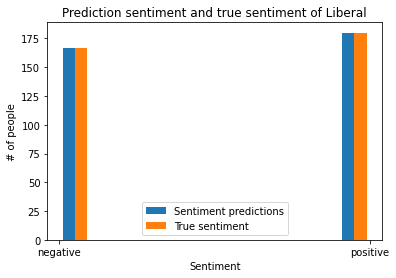

In [54]:
#Plot the Liberal graph
sentiment_predictions = df_c[df_c['political_party'] == 'Liberal']['predictions']
true_sentiment = df_c[df_c['political_party'] == 'Liberal']['sentiment']
plt.hist([sentiment_predictions, true_sentiment])
plt.legend(['Sentiment predictions', 'True sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('# of people')
plt.title('Prediction sentiment and true sentiment of Liberal')
plt.show()

From the result shown above, we can see that the number of people who support the Liberal and the number of people who choose negative to the Liberal are very close. The gap between two groups are the smallest among these four parties, so we can say it is the most controversial party. The sentiment predictions results are almost the same as the true sentiment data.

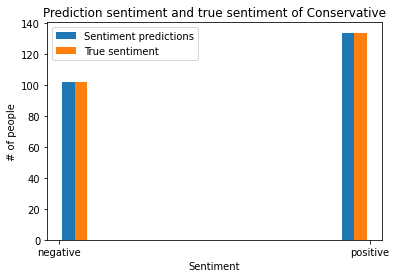

In [55]:
sentiment_predictions = df_c[df_c['political_party'] == 'Conservative']['predictions']
true_sentiment = df_c[df_c['political_party'] == 'Conservative']['sentiment']
plt.hist([sentiment_predictions, true_sentiment])
plt.legend(['Sentiment predictions', 'True sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('# of people')
plt.title('Prediction sentiment and true sentiment of Conservative')
plt.show()

Conservative party is also kind of controversial, around 130 which is 2/3 of the people agree with it,  around 100 which is 43% of people has negative opinion. The sentiment predictions results are almost the same as the true sentiment data.

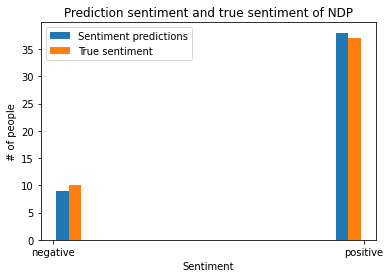

In [56]:
sentiment_predictions = df_c[df_c['political_party'] == 'NDP']['predictions']
true_sentiment = df_c[df_c['political_party'] == 'NDP']['sentiment']
plt.hist([sentiment_predictions, true_sentiment])
plt.legend(['Sentiment predictions', 'True sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('# of people')
plt.title('Prediction sentiment and true sentiment of NDP')
plt.show()

Form the graph, we can see that the different between the number of people who support and who disagree is very large. Most of people who talk about the NDP present positive opinion. The Sentiment prediction result for negative group is lower than the true sentiment data, and the Sentiment prediction result for positive group is a little higher than the true sentiment data. Also, there are much less people talk about NDP compare to Liberal and Conservative.

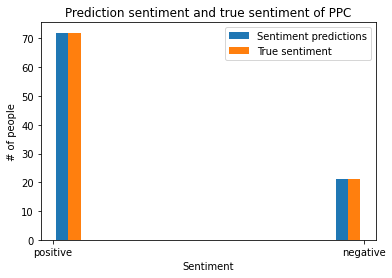

In [57]:
sentiment_predictions = df_c[df_c['political_party'] == 'PPC']['predictions']
true_sentiment = df_c[df_c['political_party'] == 'PPC']['sentiment']
plt.hist([sentiment_predictions, true_sentiment])
plt.legend(['Sentiment predictions', 'True sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('# of people')
plt.title('Prediction sentiment and true sentiment of PPC')
plt.show()

For the graph, we can see that the different between the number of people who support and who disagree is very large. Most of people who talk about the PPC present positive opinion. The Sentiment prediction result is almost the same as the true sentiment data.

Suggestion: We notice that the amount of data is not balanced among these four parties. We do not have too much data for NDP and PPC, which may be caused by the inappropriate hashtag or irreverent words when I try to classify the party; I could try to add more sensetive words in part2 in order to get a more extensive and balanced dataset to improve the accuracy level.

***Part4: Negative Reason Classification - Model implementation and tuning***

In [65]:
ns = df_c[df_c['sentiment'] == 'negative']
ns
# Split data
# TF-IDF, Choose Logistic Regression because it has the second high accuracy and
# the training time is less than the SVM model. The negative dataset has smaller amount
# of data as well.
TV = TfidfVectorizer()
model1_ = TV.fit(ns['text_s'])
X = model1_.transform(ns['text_s'])
y = ns['negative_reason']
X_train_, X_test_, y_train_, y_test_ = train_test_split(X,y,test_size=0.3) 

model = LogisticRegression()
model.fit(X_train_,y_train_)
predictions = model.predict(X_test_)
score = accuracy_score(y_test_,predictions)
print ('Accuracy score of TF-IDF by using logistic regression on predict negative reason is', score*100, '%')

Accuracy score of TF-IDF by using logistic regression on predict negative reason is 47.008547008547005 %


We obtain a dataframe with negative Canadian elections and split data that fit the best model just like previous parts. However, we fail to predict the correct negative reasons with accuracy score around 47%. It might be because people always write tweets to express their attitudes of the political parties but rarely describe the reason why they think this way; As a result, it is hard to match the negative reasons given. Also, sometimes people like one party because of their specific policies or offers they promised. But the reason why people disagree with one party may be very personal and hard to gather into groups. It makes us hard to model and make predictions based on current data.

Then we tune the the hyperparameters and try to find the optimal C and solver with low standard deviation to increase the accuracy. I choose to Tune the Model based on C and solver hyperparameters because I think these two parameters may impact the final model's accuracy the most. 

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train_)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0


X_train_df=pd.DataFrame(data=X_train_.toarray())
y_train_df=pd.DataFrame(data=y_train_)

#Tune the Model based on C and solver hyperparameters
#Because I think these two parameters may impact the
#final model's accuracy the most. So I want to find the best
#"C" and "Solver" for this model to find the highest accuracy
for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X_train_):
            X_train_2, X_test_2 = X_train_df.values[train_idx], X_train_df.values[test_idx]
            y_train_2, y_test_2 = y_train_df.values[train_idx], y_train_df.values[test_idx]
            X_train_2 = scaler.fit_transform(X_train_2)
            X_test_2 = scaler.transform(X_test_2)
            model.fit(X_train_2, y_train_2)

            predictions = model.predict(X_test_2)
            
            score = accuracy_score(y_test_2,predictions)

            accuracy[np_idx] = score*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a best score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 10, 'solver': 'newton-cg'}
Best Score: 47.778%(7.115%)

The optimal log model uses C=10, and a newton-cg solver, and has a best score of 47.778% with a standard deviation of 7.115%


After tunning, I find out that the accuracy score is still around 47.8%. After taking a look of the test data, My suggestion is to gather some sensetive key words to identify and combine similar reasons into fewer categories.

In [62]:
y_train_df=pd.DataFrame(data=y_train_)
print(y_train_df.negative_reason.value_counts())
y_test_df=pd.DataFrame(data=y_test_)
print(y_test_df.negative_reason.value_counts())
# Others, calling election early, tell lies, economy are the 
# most common negative reasons.  

others                                 102
calling election early                  51
tell lies                               43
covid                                   20
economy                                 14
scandal                                 10
gun control                             10
climate problem                          9
healthcare and marijuana                 5
women reproductive right and racism      4
segregation                              2
Name: negative_reason, dtype: int64
others                      47
calling election early      22
tell lies                   18
climate problem              6
economy                      6
gun control                  6
covid                        5
scandal                      4
healthcare and marijuana     2
segregation                  1
Name: negative_reason, dtype: int64


In [63]:
# Covid, segregation, gun control, healthcare and marijuana are all covid and safe related problems
y_train_df.negative_reason.replace(['segregation', 'covid ', 'gun control', 'healthcare and marijuana'], 'covid and safe', inplace = True)
y_test_df.negative_reason.replace(['segregation', 'covid ', 'gun control', 'healthcare and marijuana'], 'covid and safe', inplace = True)
# Negative reasons of scandal is very similar to tell lies, we can combine them;
y_train_df.negative_reason.replace('scandal', 'tell lies', inplace = True) 
y_test_df.negative_reason.replace('scandal', 'tell lies', inplace = True)
# The remaining uncommon reasons can combine with others to reduce categories
y_train_df.negative_reason.replace(['climate problem', 'economy', 'women reproductive right and racism'], 'others', inplace = True) 
y_test_df.negative_reason.replace(['climate problem', 'economy', 'women reproductive right and racism'], 'others', inplace = True) 
print(y_train_df.negative_reason.value_counts())
print(y_test_df.negative_reason.value_counts()) # In the end, we have 4 categories

others                    129
tell lies                  53
calling election early     51
covid and safe             37
Name: negative_reason, dtype: int64
others                    59
tell lies                 22
calling election early    22
covid and safe            14
Name: negative_reason, dtype: int64


In [64]:
model = LogisticRegression()
model.fit(X_train_,y_train_df)
predictions = model.predict(X_test_)
score = accuracy_score(y_test_df,predictions)
print ('Accuracy score of TF-IDF by using Logistic Regression on predict negative reason a is', score*100, '%')

Accuracy score of TF-IDF by using Logistic Regression on predict negative reason a is 53.84615384615385 %


We can see that after we combine some similar negative reason together, the accuracy score increases by 6%.